In [198]:
#importer les bibliothèques

import pandas as pd 
import numpy as np
import scipy.stats

#visualisation
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import bokeh.io
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')

In [199]:
#lecture du fichier 

df = pd.read_csv("data.csv")

#affichage df 10 premières lignes 


df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


# Preprocessing du dataset 

In [200]:
#information sur le dataset 
df.info()

"""un dataset avec 569 entrées : 35 variables . pas de valeurs manquantes
variable Unnamed : 32 à supprimer 
"""
#suppression de la col Unnamed: 32

df.drop(["Unnamed: 32"], axis = 1, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [201]:
# shape du dataset 

df.shape #32 col et 569 entrées ok


#verification NaN

df.isna().sum() # Ok pas de NaN
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [202]:
# description statistique pour la colonne diagnosis qui est un Objet (include = "Object")
df.describe(include="object") 

"""
ici : notre target qui est une variable catégorielle a deux valeurs B et M
dataset composé +  valeurs B fréquence d'apparition 357

B : bénigne 
M : Maligne 
"""
df['diagnosis'].value_counts()    

B    357
M    212
Name: diagnosis, dtype: int64

# I- Visualisation des données du dataset 

In [203]:
#histogramme modalités de la variable diagnosis 

px.histogram(df,             
            x = 'diagnosis', 
            width = 600,
            height = 600)


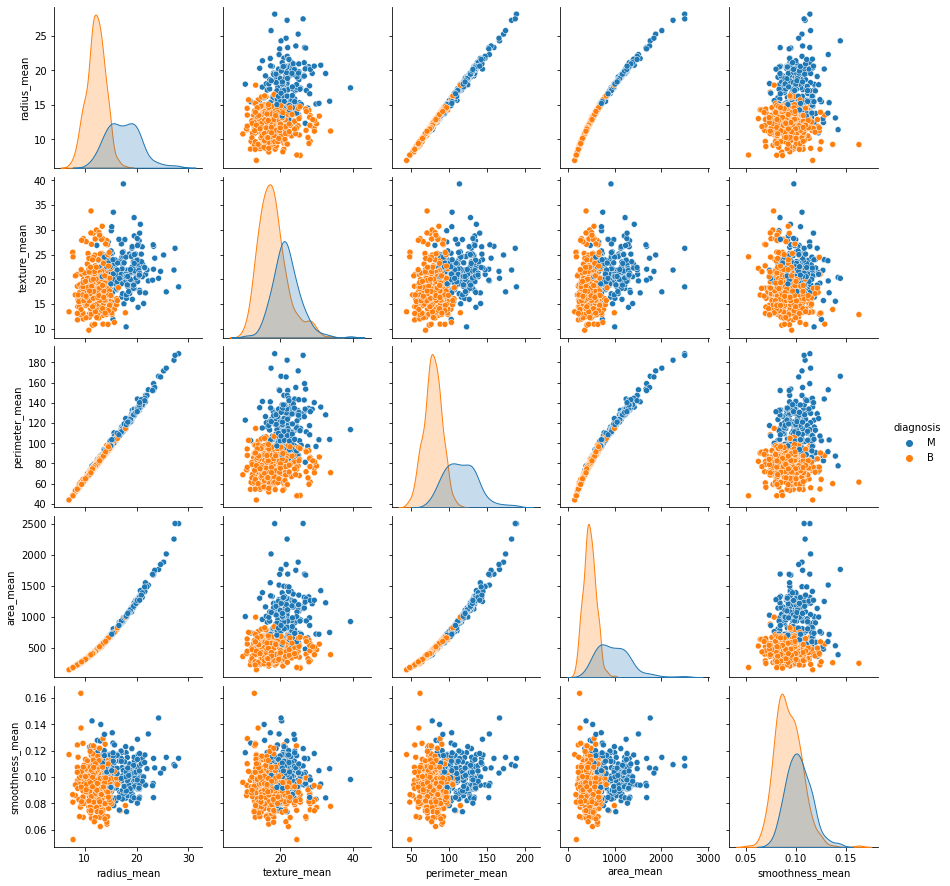

'\ncorrélation entre radius  and area and perimeter \n+ radius mean hight + diagnosis M \n'

In [204]:
col =["diagnosis","radius_mean", "texture_mean" , "perimeter_mean", "area_mean", "smoothness_mean"]

sns.pairplot(df[col], 
             hue ='diagnosis')
plt.show()

"""
corrélation entre radius  and area and perimeter 
+ radius mean hight + diagnosis M 
"""

# Preprocessing 

In [205]:
#importation du label encoder

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

# convertir l es modalités pour la variable diagnosis en valeur numérique 

df['diagnosis']= label_encoder.fit_transform(df['diagnosis'])

#verification

df['diagnosis'].value_counts() #  0 = B / 1 = M


0    357
1    212
Name: diagnosis, dtype: int64

<AxesSubplot:>

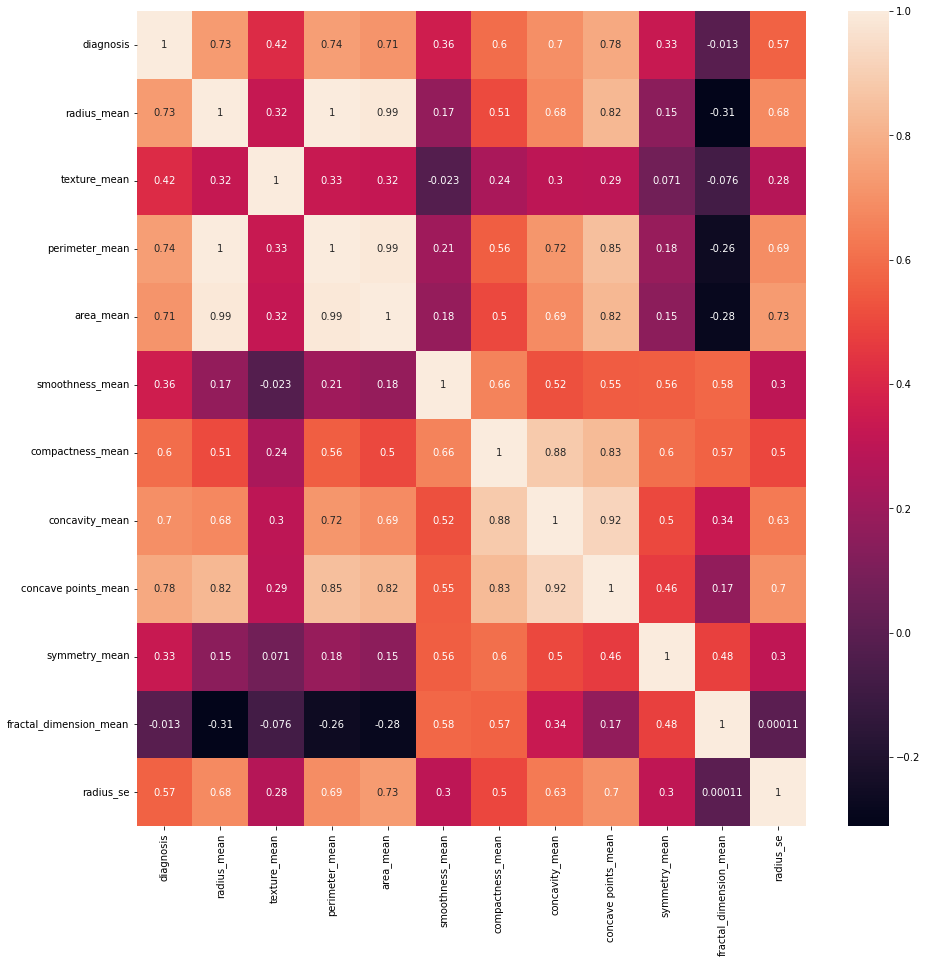

In [206]:
col = ["diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean",
       "smoothness_mean","compactness_mean","concavity_mean","concave points_mean",
       "symmetry_mean","fractal_dimension_mean","radius_se"]

df_corr = df[col].corr()

#heatmap 
plt.figure(figsize = (15,15))
sns.heatmap(df_corr, annot= True)

# Machine Learning Model

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [233]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report

In [210]:
# variable cible 
y = df[['diagnosis']] 

"""
 les variables features ont été choisi à partir des coefficient de corrélation avec la variable cible
 coef corr > 0.6 
"""
#features 
X = df[["radius_mean",
              "perimeter_mean",
              "area_mean",
              "symmetry_mean",
              "compactness_mean",
              "concave points_mean"]]

# verification shape 

features.shape #569 lignes et 6 variables
target.shape  #569 lignes , 1 variable

(569, 1)

In [211]:
# Split the dataset : 80% train , 20% test 
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2,)

In [212]:
#standardisation des valeurs entre 0 - 1 pour les features tant sur l'echantillon 
#test qu l'echantillon train

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Logistic Regression

In [213]:
#création de l'objet log_reg
log_reg = LogisticRegression()

#entrainement du model 
log_reg.fit(X_train, y_train)

#prédire à partir des features test
y_pred = log_reg.predict(X_test)

Logistic Regression metric 

In [216]:
#confusion matrix : FN & FP must be low 
cm = confusion_matrix(y_test, y_pred) # 68 TP ; 37 TN; 7 FN ; 2 FP

#model score
log_reg.score(X_test, y_test) # 87.71%

#taux d'accuracy 
accuracy = accuracy_score(y_pred, y_test) #92% accurate 

print("accuracy:",accuracy )

accuracy: 0.9385964912280702


In [240]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        74
           1       0.88      0.95      0.92        40

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



# RandomForestClassifier

In [217]:
model = RandomForestClassifier(n_estimators = 10, criterion='entropy', random_state=5)
#train model 
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=5)

In [218]:
#model performance : 0.92
model.score(X_test, y_test)

0.9298245614035088

In [219]:
y_pred_r =model.predict(X_test)

In [220]:
cm_r = confusion_matrix(y_pred_r, y_test)


In [221]:
accuracy_r = accuracy_score(y_pred_r, y_test) #92% 

In [241]:
print(classification_report(y_test, y_pred_r))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        74
           1       0.88      0.93      0.90        40

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114



# Decision Tree Classifier

In [223]:
clf = DecisionTreeClassifier()
clf= clf.fit(X_train , y_train)

In [224]:
#default values used for decision tree classifier
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [225]:
y_pred_d = clf.predict(X_test)

In [232]:
cm_d =  confusion_matrix(y_pred_d, y_test)

In [230]:
accuracy_d = accuracy_score(y_pred_d, y_test) #90.3% 

In [242]:
print(classification_report(y_test, y_pred_d))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93        74
           1       0.85      0.88      0.86        40

    accuracy                           0.90       114
   macro avg       0.89      0.90      0.89       114
weighted avg       0.90      0.90      0.90       114



# Cross Validation K Fold

In [256]:
from sklearn.model_selection import KFold, cross_val_score
cv = KFold(n_splits=5)
cross_val_score(log_reg, X, y , cv = cv)

array([0.78070175, 0.86842105, 0.95614035, 0.92105263, 0.9380531 ])

In [257]:
cross_val_score(model, X, y , cv = cv)

array([0.80701754, 0.9122807 , 0.97368421, 0.94736842, 0.94690265])

In [258]:
cross_val_score(clf, X, y , cv = cv)

array([0.8245614 , 0.87719298, 0.93859649, 0.92982456, 0.92920354])